In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [13]:
image = cv2.imread('../notebooks/images/truck.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:
* `segmentation` : the mask
* `area` : the area of the mask in pixels
* `bbox` : the boundary box of the mask in XYWH format
* `predicted_iou` : the model's own prediction for the quality of the mask
* `point_coords` : the sampled input point that generated this mask
* `stability_score` : an additional measure of mask quality
* `crop_box` : the crop of the image used to generate this mask in XYWH format

In [ ]:
# 

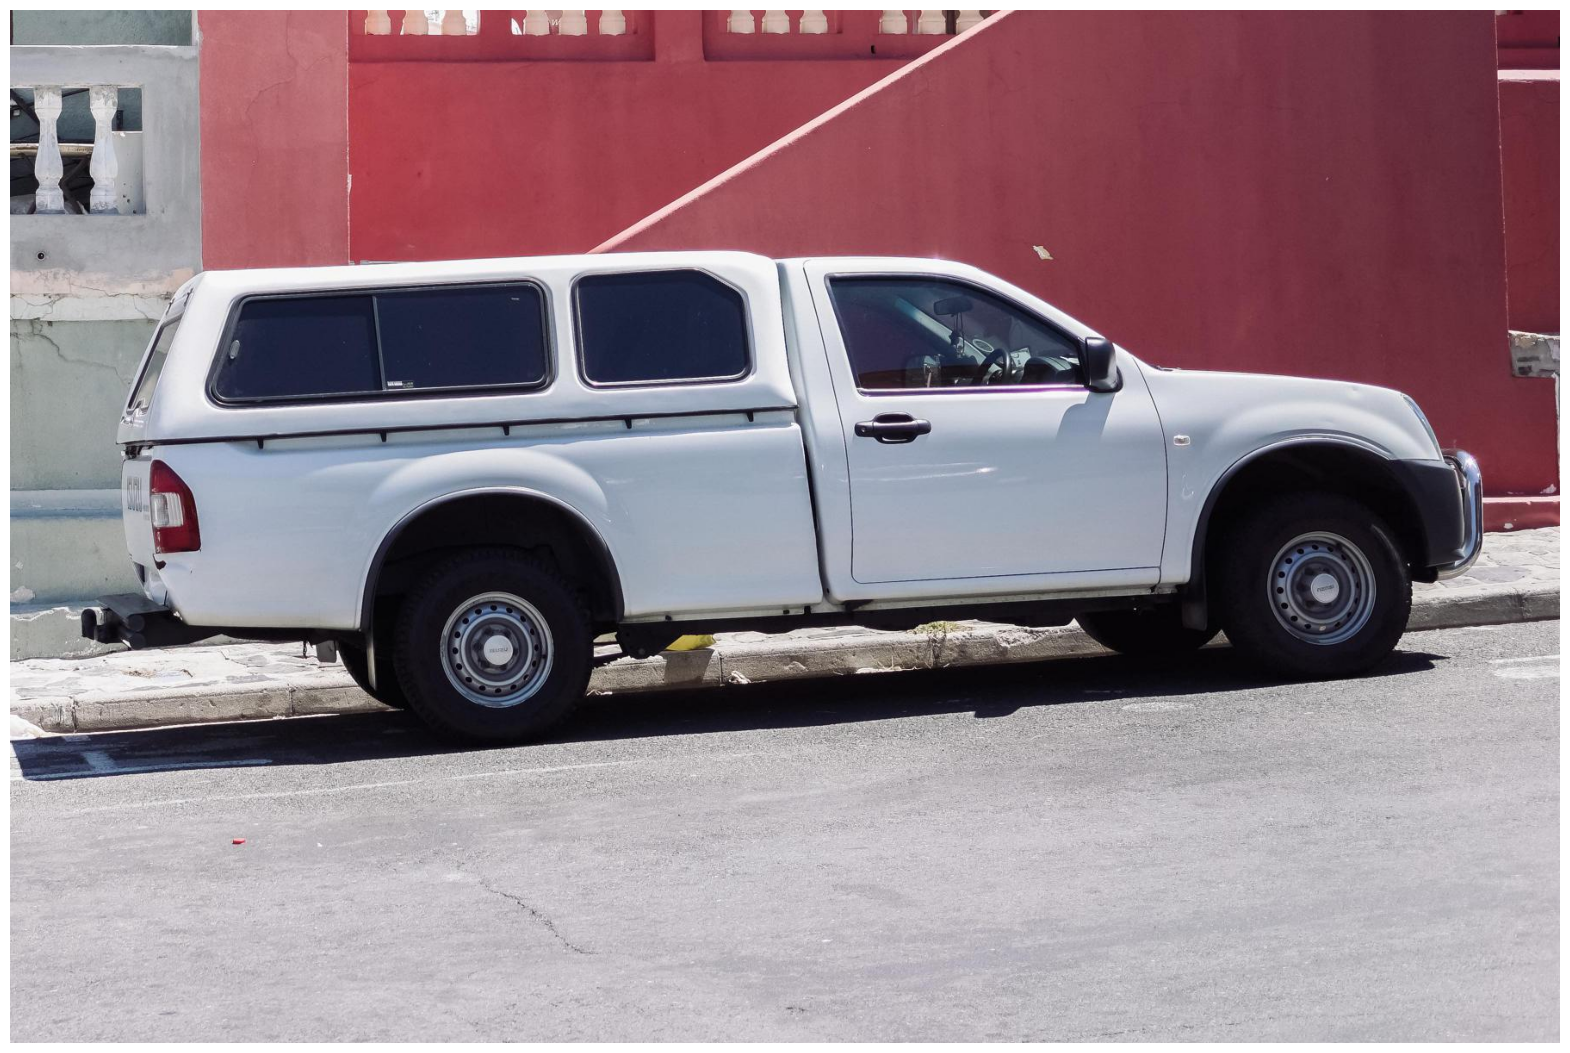

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

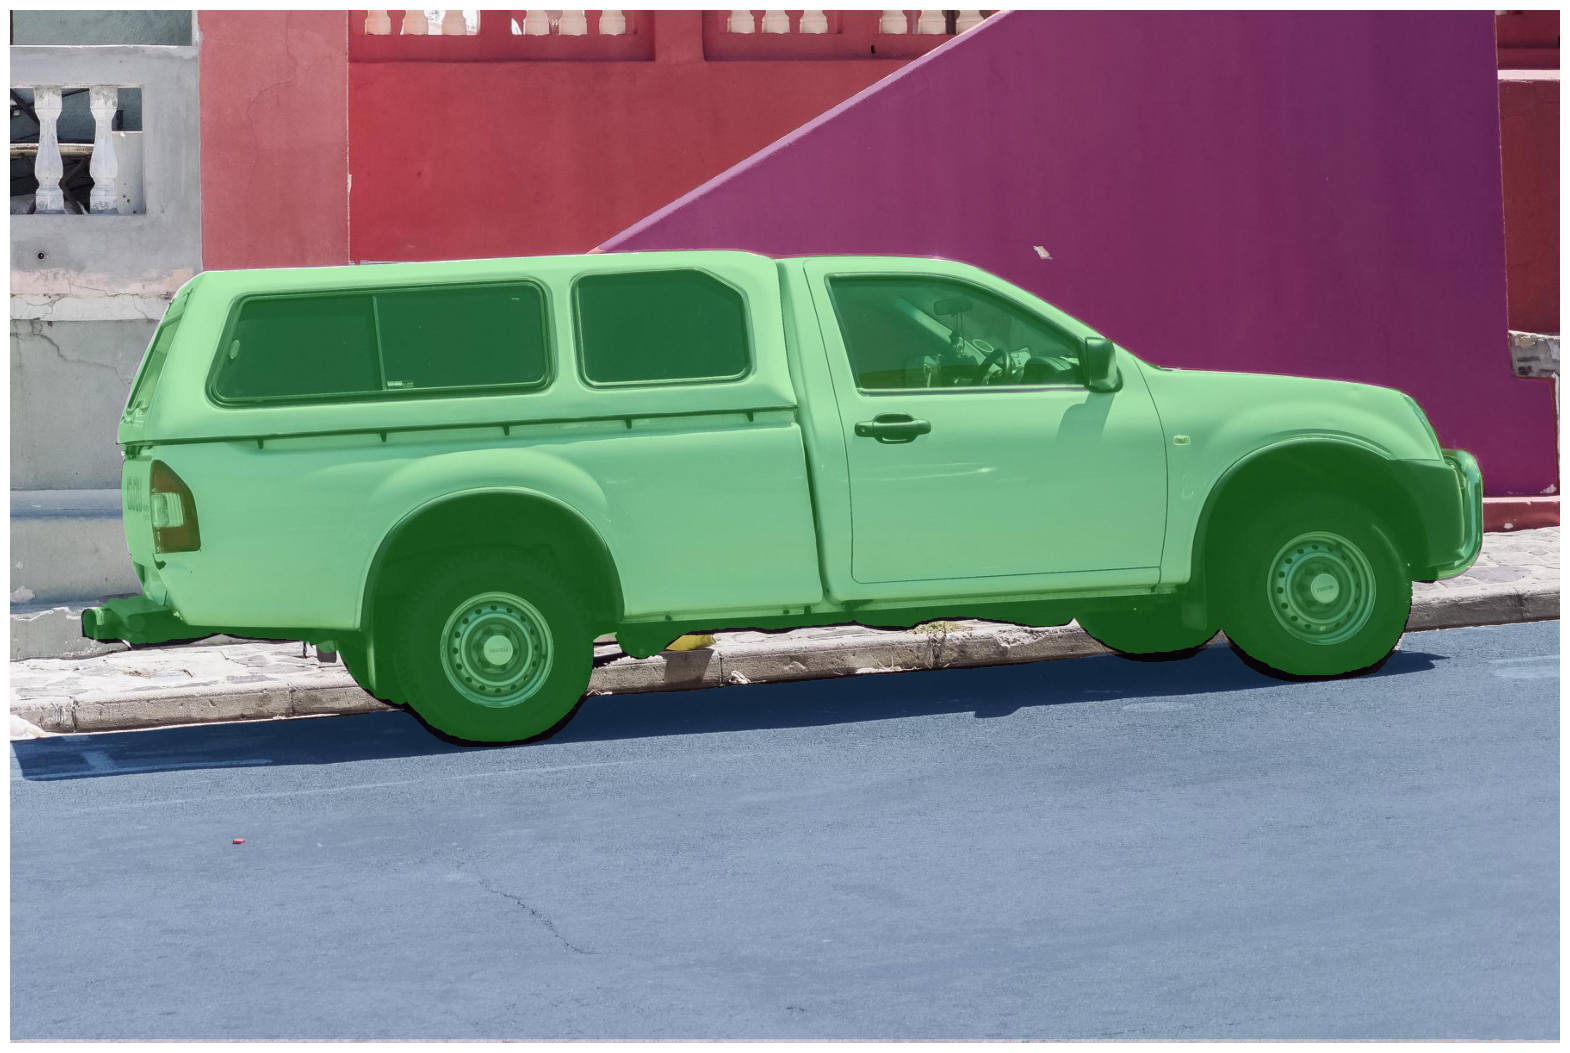

Segmentations found: 3


In [22]:
# Load the object from the pickle file
with open("../out/truck.p", "rb") as pickle_file:
    masks = pickle.load(pickle_file)
    
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
print("Segmentations found: {}".format(len(masks)))